# importing libraries

In [1]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn import preprocessing 
import statsmodels.api as sm
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
filename="/Users/oniolumide/Desktop/healthcare-dataset-stroke-data.csv"
stroke_data=pd.read_csv(filename)
%matplotlib inline
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# data wrangling

In [2]:
stroke_data[('stroke')].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# Balance data 

In [3]:
shuffled_data = stroke_data.sample(frac=1,random_state=4)
stroke_data123 = stroke_data.loc[stroke_data['stroke'] == 1]
non_stroke_df = stroke_data.loc[stroke_data['stroke'] == 0].sample(n= 821,random_state= 123,replace= True)

In [41]:
balanced_data = pd.concat([stroke_data123, non_stroke_df])
balanced_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [42]:


balanced_data[('stroke')].value_counts()

0    821
1    249
Name: stroke, dtype: int64

In [29]:
# stroke_data.head(5)

In [43]:
vc=balanced_data["gender"].value_counts()
vc

Female    619
Male      451
Name: gender, dtype: int64

In [45]:
vc=stroke_data["smoking_status"].value_counts()
vc

never smoked       393
Unknown            302
formerly smoked    197
smokes             178
Name: smoking_status, dtype: int64

In [46]:
vc=stroke_data["work_type"].value_counts()
vc

Private          636
Self-employed    182
Govt_job         131
children         119
Never_worked       2
Name: work_type, dtype: int64

In [48]:
vc=balanced_data["Residence_type"].value_counts()
vc

Urban    549
Rural    521
Name: Residence_type, dtype: int64

In [49]:
stroke_mapping = {1:'Yes' ,0:'No'}
strokedata1=stroke_data.assign(Stroke  = balanced_data.stroke.map(stroke_mapping))
strokedata1.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Yes
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Yes
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Yes
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Yes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Yes


In [50]:
stroke_mapping1 = {"Urban":"0","Rural":"1"}
strokedata2=strokedata1.assign(ethnic  = strokedata1.Residence_type.map(stroke_mapping1))
strokedata2.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Stroke,ethnic
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Yes,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Yes,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Yes,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Yes,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Yes,1


In [51]:
stroke_mapping3 = {"Private":"0","Self-employed":"1","children":"2","Govt_job":"3","Never_worked":"4"} 
strokedata3=strokedata2.assign(work_type_  = strokedata2.work_type.map(stroke_mapping3))
strokedata3.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Stroke,ethnic,work_type_
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Yes,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Yes,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Yes,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Yes,0,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Yes,1,1


In [52]:
stroke_mapping4 = {"never smoked":"0","Unknown":"1","formerly smoked":"2","smokes":"3"} 
strokedata4=strokedata3.assign(smoke  = strokedata3.smoking_status.map(stroke_mapping4))
strokedata4.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Stroke,ethnic,work_type_,smoke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Yes,0,0,2
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Yes,1,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Yes,1,0,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Yes,0,0,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Yes,1,1,0


# Exploratory Data Analysis

In [55]:
vc=balanced_data["gender"].value_counts()
vc

Female    619
Male      451
Name: gender, dtype: int64

In [56]:

value_c = pd.DataFrame({'Gender':["Male","Female"], 
                         'Frequency':[619,451]})
value_c



,Gender,Frequency
0,Male,619
1,Female,451


# Data Visualization

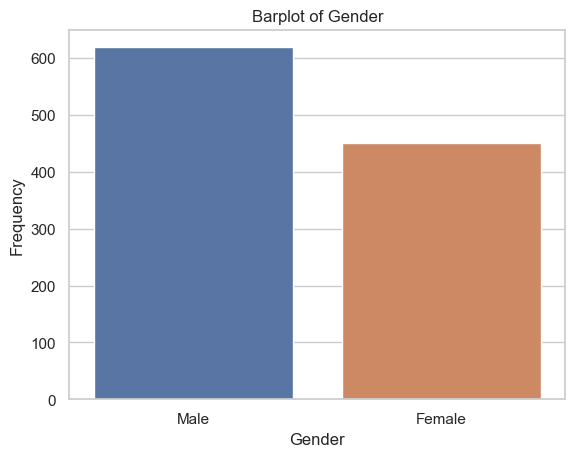

In [57]:
p = sns.barplot(data= value_c,x= 'Gender',y= 'Frequency').set(title='Barplot of Gender')

In [59]:
vc=strokedata4["Stroke"].value_counts()
vc

No     821
Yes    249
Name: Stroke, dtype: int64

In [60]:
vc=strokedata4["Stroke"].value_counts()
vc
value_c = pd.DataFrame({'Stroke':["Yes","No"], 
                         'Frequency':[249,821]})
value_c

,Stroke,Frequency
0,Yes,249
1,No,821


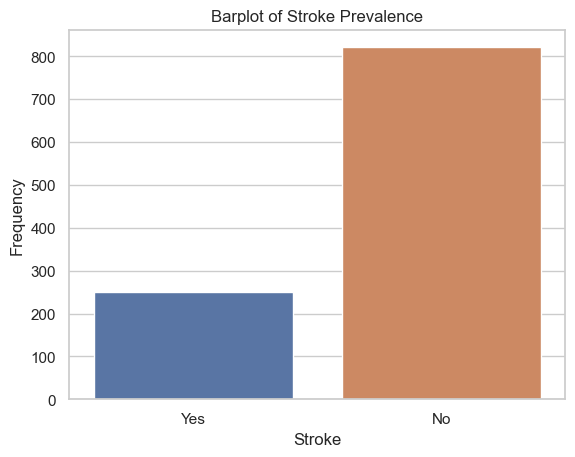

In [61]:
p = sns.barplot(data= value_c,x= 'Stroke',y= 'Frequency').set(title='Barplot of Stroke Prevalence')

[Text(0.5, 1.0, 'Distribution of Age')]

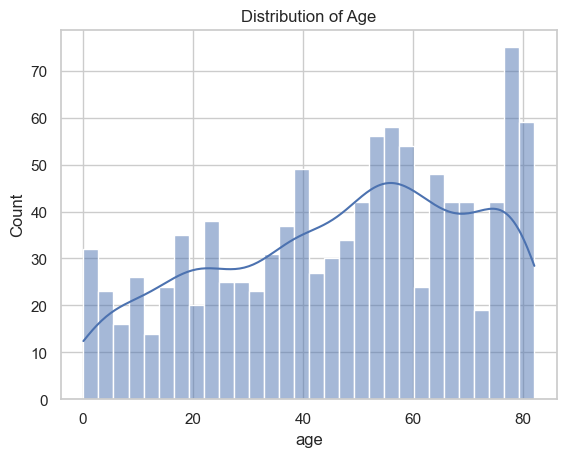

In [70]:
sns.histplot(data=strokedata4, x="age",kde=True,bins=30,fill=True,color="b").set(title="Distribution of Age")


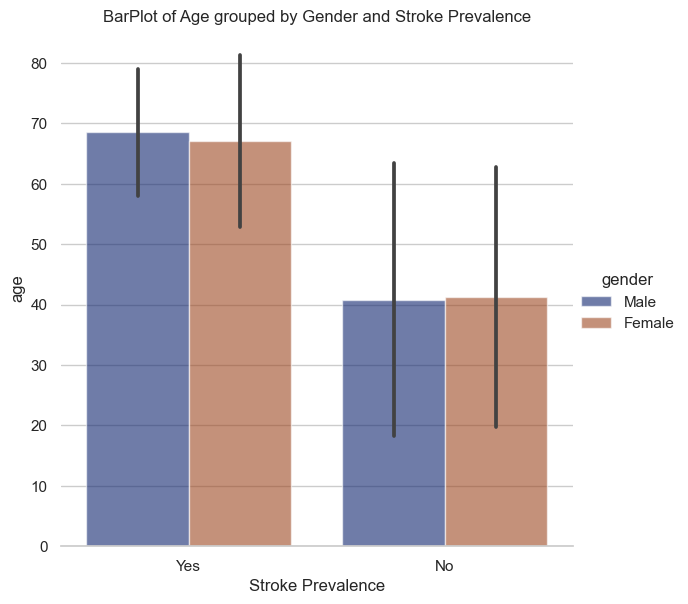

In [63]:
import seaborn as sns
sns.set_theme(style="whitegrid")

#stroke_data = sns.load_dataset("stroke_data")

#Draw a nested barplot by species and sex
g = sns.catplot(
    data=strokedata4, kind="bar",
    x="Stroke", y="age", hue="gender",
    errorbar="sd", palette="dark", alpha=.6, height=6
).set(title='BarPlot of Age grouped by Gender and Stroke Prevalence')
g.despine(left=True)
g.set_axis_labels("Stroke Prevalence", "age")
g.legend.set_title("gender")


# Feture selections

In [71]:
corr_matrix = strokedata4.corr()
print(corr_matrix)

                         id       age  hypertension  heart_disease  \
id                 1.000000 -0.033793     -0.028067      -0.003764   
age               -0.033793  1.000000      0.307896       0.254176   
hypertension      -0.028067  0.307896      1.000000       0.074091   
heart_disease     -0.003764  0.254176      0.074091       1.000000   
avg_glucose_level  0.012878  0.281266      0.153422       0.182264   
bmi                0.003096  0.289660      0.133807       0.059052   
stroke             0.032502  0.486889      0.234963       0.255965   

                   avg_glucose_level       bmi    stroke  
id                          0.012878  0.003096  0.032502  
age                         0.281266  0.289660  0.486889  
hypertension                0.153422  0.133807  0.234963  
heart_disease               0.182264  0.059052  0.255965  
avg_glucose_level           1.000000  0.192517  0.232388  
bmi                         0.192517  1.000000  0.093574  
stroke                    

/var/folders/9k/m2jk2f0j03s_d83gk44hv3k00000gn/T/ipykernel_13017/1519896097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = strokedata4.corr()


In [65]:
# strokedata1.info()

In [66]:
# sd4=strokedata4.dropna()
# sd4.info()

In [111]:
# X = sd4.loc[:, ['age','heart_disease',"hypertension","heart_disease"]].values
X = strokedata4.loc[:, ['age','heart_disease','avg_glucose_level']].values
#X = strokedata4.loc[:, ['age', 'hypertension', 'heart_disease',"avg_glucose_level"]].values

y = strokedata4.loc[:, 'stroke'].values

In [112]:
# strokedata1.info()

In [113]:
# strokedata4.info()

# splitting data

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101,test_size=0.3)

# Standardize the Data


In [115]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Training 

In [116]:
logit_model=sm.Logit(y_train,X_train)
results=logit_model.fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.596316
         Iterations 6
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.131  
Dependent Variable: y                AIC:              899.2818
Date:               2022-11-26 01:08 BIC:              913.1381
No. Observations:   749              Log-Likelihood:   -446.64 
Df Model:           2                LL-Null:          -394.93 
Df Residuals:       746              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     6.0000                                     
------------------------------------------------------------------
       Coef.     Std.Err.      z       P>|z|      [0.025    0.975]
------------------------------------------------------------------
x1     0.8452      0.0917    9.2202    0.0000     0.6656    1.0249
x2     0.2379      0.1025    2.3212    0.0203     0.0370    0.4388
x3     0.167

In [117]:
# logit_model_test=sm.Logit(y_test,X_test)
# results=logit_model_test.fit()
# print(results.summary2())

In [118]:
clf = LogisticRegression(solver='liblinear',
                         multi_class='ovr', 
                         random_state = 0)

clf.fit(X_train, y_train)
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Training accuracy: 0.8317757009345794
Test accuracy: 0.7881619937694704


In [119]:
# clf11=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#                    intercept_scaling=1, l1_ratio=None, max_iter=100,
#                    multi_class='warn', n_jobs=None, penalty='l2',
#                    random_state=None, solver='warn', tol=0.0001, verbose=0,
#                    warm_start=False)
# clf11.fit(X_train, y_train)
# print('Training accuracy:', clf11.score(X_train, y_train))
# print('Test accuracy:', clf11.score(X_test, y_test))

In [120]:
# clf11.intercept_

In [121]:
clf.predict_proba(X_test[0:1])
predictions = clf.predict(X_test)

# Model Evaluation 

In [122]:
score = clf.score(X_test, y_test)
print("The performance of the model is evaluated as %0.3f"%score)

The performance of the model is evaluated as 0.788


In [123]:
# print(clf.fit(X_train, y_train))

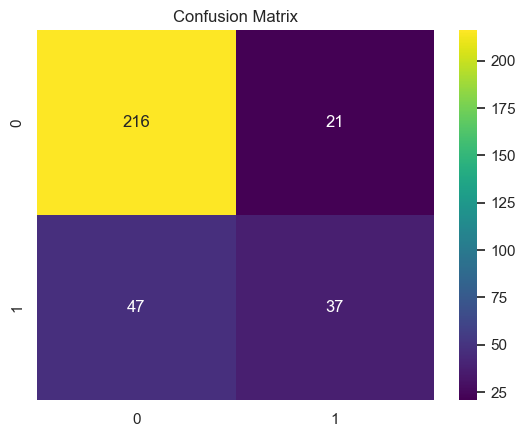

In [124]:
sns.heatmap(confusion_matrix(y_test,predictions), annot= True, cmap = 'viridis', fmt="2")
plt.title('Confusion Matrix')
plt.show()

0.6759342977697408


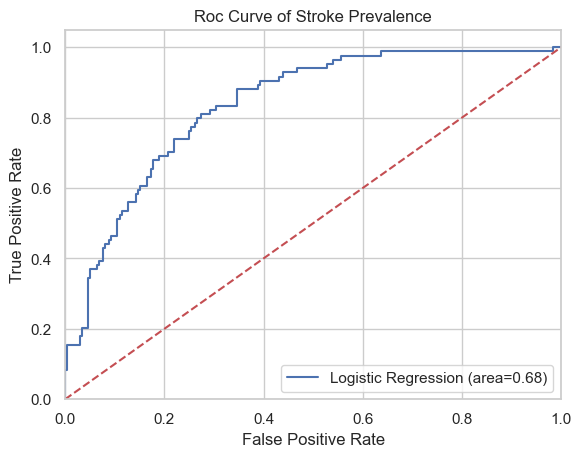

In [125]:
log_roc_auc=roc_auc_score(y_test,clf.predict(X_test))
print(log_roc_auc)
fpr, tpr, thresholds=roc_curve(y_test,clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr,label="Logistic Regression (area=%0.2f)"%log_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc Curve of Stroke Prevalence")
plt.legend(loc="lower right")
plt.show()

In [126]:
print(log_roc_auc)

0.6759342977697408


In [127]:
from sklearn.metrics import r2_score

In [109]:
preds = clf.predict(X_test)
r2_score(y_test, preds)

-0.08031946955997604

In [110]:
clf_ = LogisticRegression()
clf_.fit(X_train, y_train)
pred=clf_.predict(X_test)
clf_.score(X_test,y_test)

0.7881619937694704